# What Describes a Fully Remote Working Developer the Best?
## From Age and Company Size to Menatl Health

Introduction: In the rapidly evolving landscape of remote work, understanding the key factors that describe a fully remote working developer becomes increasingly valuable. Beyond traditional metrics such as age, company size, main branch, country, and years of experience, it is crucial to consider the impact of mental health in this context. Drawing insights from the Stack Overflow Annual Developer Survey data from 2022, we will delve into a comprehensive analysis to shed light on the characteristics that best define a fully remote working developer.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('max_columns', 75)
pd.set_option('display.max_row', None)
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

In [3]:
df.head(3)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,...,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,...,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies);Stack Overflow;Stack Exchange,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)",Technical documentation;Blogs;Programming Games;Written Tutorials;Stack Overflow,NaN,14,5,"Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability",20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern Ireland,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,...,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have an anxiety disorder",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0


In [4]:
df.shape

(73268, 79)

In [5]:
schema.shape

(79, 6)

In [6]:
schema.head(79)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hello world! </strong></span></div>\n\n<div> </div>\n\n<div>Thank you for taking the 2022 Stack Overflow Developer Survey, the longest running survey of software developers (and anyone else who codes!) on Earth. </div>\n\n<div> </div>\n\n<div>As in previous years, anonymized results of the survey will be made publicly available under the Open Database License, where anyone can download and analyze the data. On that note, throughout the survey, certain answers you and your peers give will be treated as personally identifiable information, and therefore kept out of the anonymized results file. We'll call out each of those in the survey with a note saying ""This information will be kept private."" </div>\n\n<div> </div>\n\n<div>There are seven sections in this survey. The 2nd, 3rd, and 4th sections will appear in a random order.</div><div><br></div>\n\n<div> 1. Basic Information</div>\n\n<div> 2. Education, Work, and Career</div>\n\n<div> 3. Technology and Tech Culture</div>\n\n<div> 4. Stack Overflow Usage + Community</div>\n\n<div> 5. Demographic Information </div>\n\n<div> 6. Professional Developer Series (Optional)</div><div> 7. Final Questions</div>\n\n<div> \n<div>Most questions in this survey are optional. Required questions are marked with *. This anonymous survey will take about 10 minutes to complete. We encourage you to complete it in one sitting.</div><div><br></div>\n</div>\n\n<div><strong>If you use security or ad-blocking plugins, you may see error messages</strong></div>\n\n<div>Our third-party software provider, Qualtrics, does not work well with certain ad blockers and security software. To avoid error messages that prevent you from taking the survey, please try specifically unblocking Qualtrics in your plugin or pausing the plugin while you take the survey. </div>\n\n<div> </div>\n\n<div>To begin, click <strong>Next.</strong></div>",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: arial,helvetica,sans-serif; font-weight: 700;"">Basic Information</span><br>\n<br>\n<p><span style=""font-size:16px; font-family:arial,helvetica,sans-serif;"">The first section will focus on some basic information about who you are.<br>\n<br>\nMost questions in this section are required. Required questions are noted with *.</span></p>",False,DB,TB
3,QID2,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."" <b>*</b>",True,MC,SAVR
4,QID296,Employment,Which of the following best describes your current employment status?,False,MC,MAVR
5,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
6,QID297,CodingActivities,Which of the following best describes the code you write outside of work? Select all that apply.,False,MC,MAVR
7,QID190,S2,"<span style=""font-size:22px; font-family: arial,helvetica,sans-serif; font-weight: 700;"">Education, work, and career</span><br />\n \n<p><span style=""font-size:16px; font-family:arial,helvetica,sans-serif;"">This section will focus on your education, work, and career.<br />\n<br />\nMost questions in this section are optional. Required questions are noted with *.</span></p>",False,DB,TB
8,QID25,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed? *,False,MC,SAVR
9,QID276,LearnCode,How did you learn to code? Select all that apply.,False,MC,MAVR


In [7]:
# 19.5% of more than 73.000 participants didn't answer the question: "Which best describes your current work situation?"
df.RemoteWork.isnull().sum()/df.shape[0]

0.19531036741824534

How is the distribution of remote work?

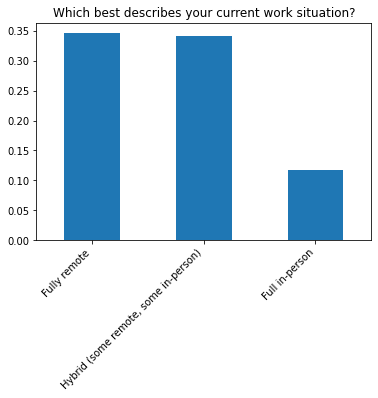

In [8]:
# from those who did reply, the minority is working full in person only -> only 14.5%
remote_vals = df.RemoteWork.value_counts()
(remote_vals/df.shape[0]).plot(kind="bar");
plt.xticks(rotation=45, ha='right');
plt.title("Which best describes your current work situation?");

In [9]:
remote_vals_perc = df.RemoteWork.value_counts(normalize = True)
remote_vals_perc

Fully remote                            0.429814
Hybrid (some remote, some in-person)    0.424387
Full in-person                          0.145799
Name: RemoteWork, dtype: float64

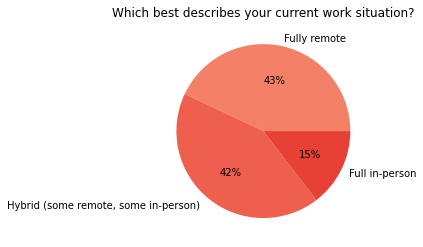

In [10]:
colors = sns.color_palette('Reds_d')
plt.pie(remote_vals_perc, colors=colors, labels=['Fully remote', 'Hybrid (some remote, some in-person) ', 'Full in-person'], autopct='%.0f%%')
plt.title('Which best describes your current work situation?')
plt.show()

In [11]:
# generating binary variable for being fully remote or not
# df['FullyRemote'] = np.where(df['RemoteWork'] == 'Fully remote', 1, 0)

In [12]:
# reduce df to columns of interest 11 columns
df_short = df[['MainBranch', 'Employment', 'RemoteWork', 'OrgSize', 'Country', 'YearsCode', 'Age', 'MentalHealth',]]

Having a look at Null values

In [13]:
df_short.isnull().sum()

MainBranch          0
Employment       1559
RemoteWork      14310
OrgSize         22229
Country          1497
YearsCode        1937
Age              2322
MentalHealth     6821
dtype: int64

In [14]:
df_short = df_short.dropna(axis=0)

In [15]:
df_short.shape

(47151, 8)

In [16]:
df_short.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47151 entries, 2 to 73266
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MainBranch    47151 non-null  object
 1   Employment    47151 non-null  object
 2   RemoteWork    47151 non-null  object
 3   OrgSize       47151 non-null  object
 4   Country       47151 non-null  object
 5   YearsCode     47151 non-null  object
 6   Age           47151 non-null  object
 7   MentalHealth  47151 non-null  object
dtypes: object(8)
memory usage: 3.2+ MB


Focus on fully remote working respondents

In [17]:
data_fully_remote = df_short.loc[df_short.RemoteWork == 'Fully remote']

In [18]:
data_fully_remote.shape

(20939, 8)

AGE

In [19]:
# What is your age?
round(data_fully_remote['Age'].value_counts(normalize = True)*100,2)

25-34 years old       46.10
35-44 years old       28.06
18-24 years old       10.56
45-54 years old        9.93
55-64 years old        3.94
65 years or older      0.77
Prefer not to say      0.33
Under 18 years old     0.30
Name: Age, dtype: float64

1. Age:
Examining age demographics of fully remote working developers reveals a diverse range. Remote work transcends generational boundaries, with professionals of various age groups embracing this flexible work model. The survey data showcases a blend of younger talent eager to leverage remote opportunities and experienced individuals seeking a better work-life balance. However the most prominent age group of fully remote working developers is the group 25-44 year olds with about 74%.  

COMPANY SIZE

In [20]:
# Approximately how many people are employed by the company or organization you currently work for?
round(data_fully_remote['OrgSize'].value_counts(normalize = True)*100,2)

20 to 99 employees                                    19.24
100 to 499 employees                                  18.58
10,000 or more employees                              12.93
1,000 to 4,999 employees                              10.55
2 to 9 employees                                       9.93
Just me - I am a freelancer, sole proprietor, etc.     8.27
500 to 999 employees                                   7.35
10 to 19 employees                                     7.35
5,000 to 9,999 employees                               4.06
I don’t know                                           1.75
Name: OrgSize, dtype: float64

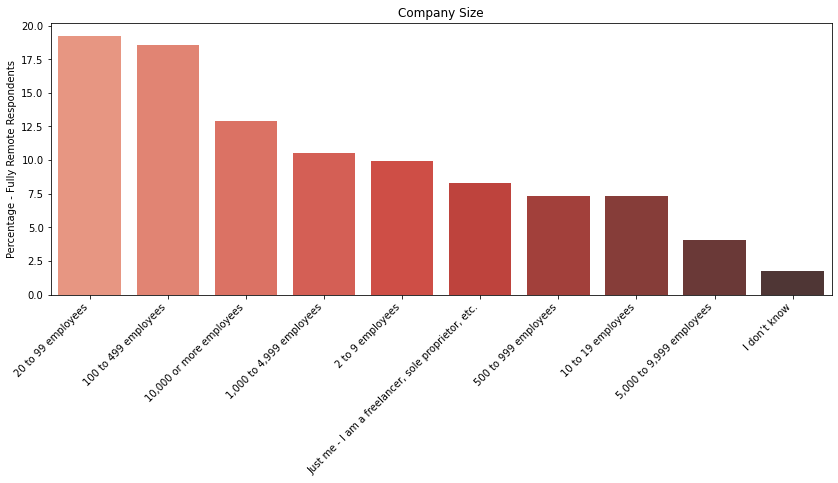

In [21]:
plot_size = round(data_fully_remote['OrgSize'].value_counts(normalize = True)*100,2)
plt.figure(figsize=(14,5))
sns.barplot(x=plot_size.index, y=plot_size, palette ='Reds_d')
plt.title('Company Size')
plt.xticks(rotation=45, ha='right');
plt.ylabel('Percentage - Fully Remote Respondents')
plt.show() 

2. Company Size:
Remote work is not limited to specific company sizes. Whether in small startups with an inherent flexible culture or larger enterprises adapting to the changing work landscape, fully remote working developers can be found across organizations of varying sizes. The data highlights the universal appeal of remote work regardless of company size.

COUNTRY

In [22]:
#Where do you live?
data_fully_remote['Country'].value_counts(normalize = True)

United States of America                                0.283395
India                                                   0.073786
United Kingdom of Great Britain and Northern Ireland    0.063613
Germany                                                 0.058885
Canada                                                  0.053298
Brazil                                                  0.048474
Poland                                                  0.031186
Spain                                                   0.027700
Russian Federation                                      0.018387
Australia                                               0.018339
France                                                  0.018291
Italy                                                   0.015617
Turkey                                                  0.013993
Ukraine                                                 0.013133
Mexico                                                  0.011748
Argentina                

3. Country:
Remote work transcends geographical boundaries, and fully remote working developers can be found in numerous countries worldwide. The top five countries are the US(28%), India(7%), UK and Northern Ireland(6%), Germany(6%) and Canada(6%) followed by countries like Brazil(5%) or Poland(3%). While the prevalence of remote work varies across regions due to cultural and infrastructural factors, the survey data demonstrates a global embrace of remote opportunities. Remote work enables developers to work effectively regardless of their physical location.

YEARS OF CODING

<AxesSubplot:>

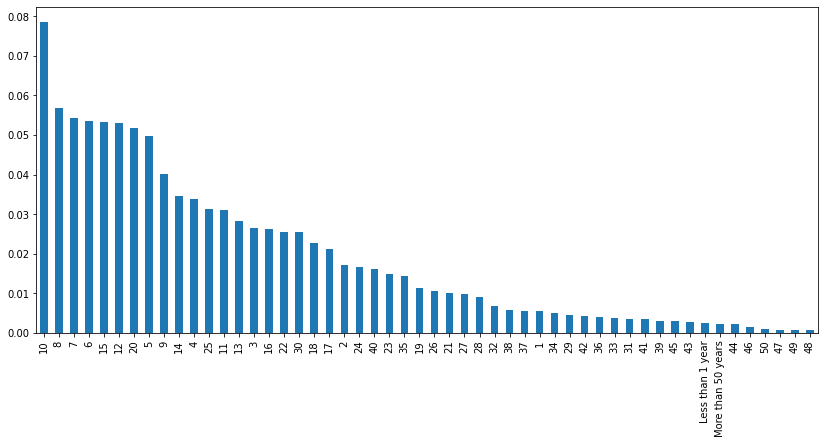

In [23]:
# Including any education, how many years have you been coding in total?
yc = data_fully_remote['YearsCode'].value_counts(normalize = True)
plt.figure(figsize=(14,6))
yc.plot(kind="bar")

MENTAL HEALTH

In [24]:
# Which of the following describe you, if any? Please check all that apply.
health_val_fr = data_fully_remote.MentalHealth.value_counts()

pd.set_option('display.max_rows', None)
health_val_fr

None of the above                                                                                                                                                                                                                                                                                                                     14590
I have a concentration and/or memory disorder (e.g., ADHD, etc.)                                                                                                                                                                                                                                                                       1018
Prefer not to say                                                                                                                                                                                                                                                                                                                       935
I ha

In [25]:
data_in_person = df_short.loc[df_short.RemoteWork == 'Full in-person']
health_val_ip = data_in_person.MentalHealth.value_counts()

#pd.set_option('display.max_rows', None)
#health_val_ip

In [26]:
possible_vals = ["None of the above", "I have a concentration and/or memory disorder (e.g., ADHD, etc.)", "Prefer not to say", "I have an anxiety disorder",
                 "I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)", "I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)", "I have learning differences (e.g., Dyslexic, Dyslexia, etc.)",                 
                 "Or, in your own words:"]

In [27]:
# This folowing two functions were adapted from the lesson "Exercise Solution: How to Break Into the Field" 
# in Udacity's Data Scientist Nanodegree:
# https://learn.udacity.com/nanodegrees/nd025/parts/cd0017/lessons/5154784e-0258-4f49-8aa1-239fc6311969/concepts/cba42751-171f-42a7-aab4-d705b33bdc25

In [28]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [29]:
def clean_and_plot(data, title='MentalHealth', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the Employment column.
    '''
    study = data['MentalHealth'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'MentalHealth': 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.xticks(rotation=45, ha='right');
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df

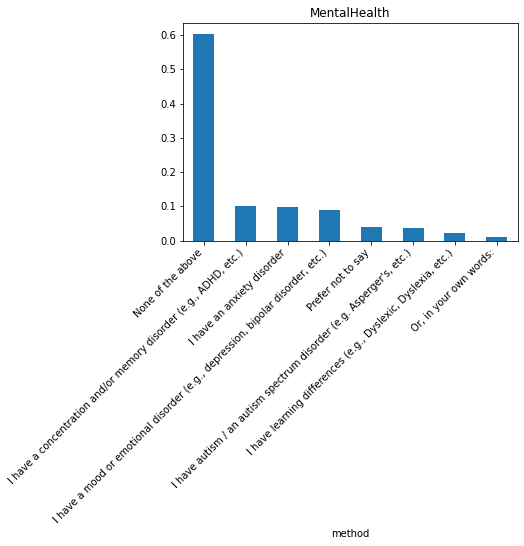

In [30]:
props_MentalHealth = clean_and_plot(data_fully_remote)

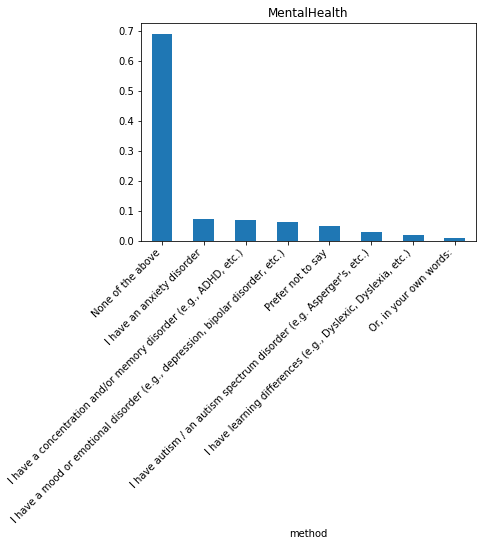

In [31]:
props_MentalHealth = clean_and_plot(data_in_person)

/home/jupyter/.local/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


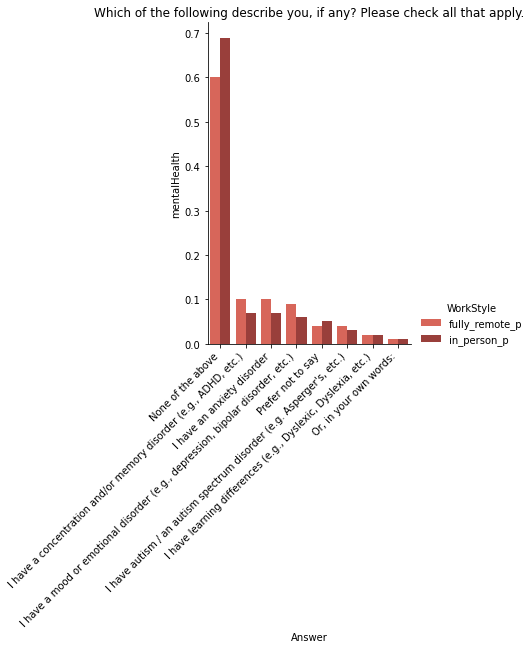

In [32]:
health1 = data_fully_remote['MentalHealth'].value_counts().reset_index()
health1.rename(columns={'index': 'Answer', 'MentalHealth': 'count'}, inplace=True)
health_df1 = total_count(health1, 'Answer', 'count', possible_vals)
health_df1.rename(columns={'count':'count_fully_remote'}, inplace=True)
health_df1.set_index('Answer', inplace=True)
health_df1['fully_remote_p'] = round((health_df1/health_df1.sum()), 2)
health_df1.drop('count_fully_remote', axis=1, inplace=True)
health_df1.reset_index(inplace=True)

health2 = data_in_person['MentalHealth'].value_counts().reset_index()
health2.rename(columns={'index': 'Answer', 'MentalHealth': 'count'}, inplace=True)
health_df2 = total_count(health2, 'Answer', 'count', possible_vals)
health_df2.rename(columns={'count':'count_in_person'}, inplace=True)
health_df2.set_index('Answer', inplace=True)
health_df2['in_person_p'] = round((health_df2/health_df2.sum()), 2)
health_df2.drop('count_in_person', axis=1, inplace=True)
health_df2.reset_index(inplace=True)

df_mentalH = pd.merge(health_df1, health_df2, on='Answer')

df = pd.melt(df_mentalH, id_vars="Answer", var_name="WorkStyle", value_name="mentalHealth")

sns.factorplot(x='Answer', y='mentalHealth', hue='WorkStyle', data=df, kind='bar', palette ='Reds_d')
plt.title('Which of the following describe you, if any? Please check all that apply.')
plt.xticks(rotation=45, ha='right');
# plt.ylabel('Percentage of Fully Remote and in Person Developers')
plt.show() 